<a href="https://colab.research.google.com/github/mgersins-design/Machine-Learning/blob/main/HW2/US_housing_price_prediction_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt
import seaborn as sns

#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Colab Notebooks/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
housing.shape

(545, 13)

In [ ]:
# Checking Null values
housing.isnull().sum()*100/housing.shape[0]
# There are no NULL values in the dataset, hence it is clean.

,0
price,0.0
area,0.0
bedrooms,0.0
bathrooms,0.0
stories,0.0
mainroad,0.0
guestroom,0.0
basement,0.0
hotwaterheating,0.0
airconditioning,0.0


In [ ]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
housing.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)



In [ ]:
Y_train = df_train.pop('price')
X_train = df_train
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,8050,3,1,1,1,1,1,0,1,1,0,furnished
41,6360,3,2,4,1,0,0,0,1,0,1,furnished
91,6750,2,1,1,1,1,1,0,0,2,1,furnished
118,6420,3,1,1,1,0,1,0,1,0,1,furnished
472,3630,4,1,2,1,0,0,0,0,3,0,semi-furnished


In [ ]:
Y_test = df_test.pop('price')
X_test = df_test
X_test.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
265,2880,3,1,2,1,0,0,0,0,0,1,semi-furnished
54,6000,3,2,2,1,1,0,0,1,1,0,semi-furnished
171,10269,3,1,1,1,0,0,0,0,1,1,semi-furnished
244,5320,3,1,2,1,1,1,0,0,0,1,semi-furnished
268,4950,4,1,2,1,0,0,0,1,0,0,semi-furnished


In [ ]:
def compute_loss(x, y, theta):
    """
    Compute cost for linear regression.

    Parameters:
    X : 4D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """

    m = len(y) # Number of training examples
    predictions = x.dot(theta) # Output: (100,1)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

def gradient_descent(x, y, theta, alpha, iterations):
    """
    Compute the optimal parameters using gradient descent for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    cost_history : Array containing the cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = x.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * x.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_loss(x, y, theta)

    return theta, cost_history

In [ ]:
x0_train = np.ones((len(X_train), 1))  # bias for training data
x0_test = np.ones((len(X_test), 1))  # bias for test data

#################################################################################################################################################################################

# Data for 1a) area, bedrooms, bathrooms, stories & parking

selected_features_1a = X_train.iloc[:, [0, 1, 2, 3, 9]] # area, bedrooms, bathrooms, stories, parking
X_train_1a = np.hstack((x0_train, selected_features_1a))  # training dataset for 1a
theta_1a = np.zeros(X_train_1a.shape[1])  # initializing of the thetas
X_test_1a = np.hstack((x0_test, X_test.iloc[:, [0, 1, 2, 3, 9]]))  # validation dataset for 1a

#################################################################################################################################################################################

# Data for 1b) area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea

selected_features_1b = X_train.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7]]
x_train_1b = np.hstack((x0_train, selected_features_1b))
theta_1b = np.zeros(x_train_1b.shape[1])
x_test_1b = np.hstack((x0_test, X_test.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7]]))


In [ ]:
alpha = 0.01
iterations = 1500

# 1a)
theta_1a = np.zeros(X_train_1a.shape[1])  # initializing of the thetas again, so this cell can be ran continuously without the thetas (the run before) being saved
theta_1a, loss_history_1a = gradient_descent(X_train_1a, Y_train, theta_1a, alpha, iterations)
print('1a) Final value of theta =', theta_1a)
print('1a) loss_history =', loss_history_1a)
print('\n')

# 1b)
theta_1b = np.zeros(x_train_1b.shape[1])
theta_1b, loss_history_1b = gradient_descent(x_train_1b, Y_train, theta_1b, alpha, iterations)
print('1b) Final value of theta =', theta_1b)
print('1b) loss_history =', loss_history_1b)

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in square
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipython-input-2337307841.py:48: RuntimeWarning: invalid value encountered in subtract
  theta -= sum_delta


1a) Final value of theta = [nan nan nan nan nan nan]
1a) loss_history = [1.11634504e+24 1.07910609e+35 1.04310935e+46 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


1b) Final value of theta = [nan nan nan nan nan nan nan nan nan]
1b) loss_history = [1.11634506e+24 1.07910612e+35 1.04310940e+46 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


In [ ]:
# 1a)
validation_prediction_1a = np.dot(X_test_1a, theta_1a)
test_loss_1a = compute_loss(X_test_1a, Y_test, theta_1a)
print('1a) test_loss =', test_loss_1a)

# 1b)
validation_prediction_1b = np.dot(x_test_1b, theta_1b)
test_loss_1b = compute_loss(x_test_1b, Y_test, theta_1b)
print('1b) test_loss =', test_loss_1b)

1a) test_loss = 0.0
1b) test_loss = 0.0


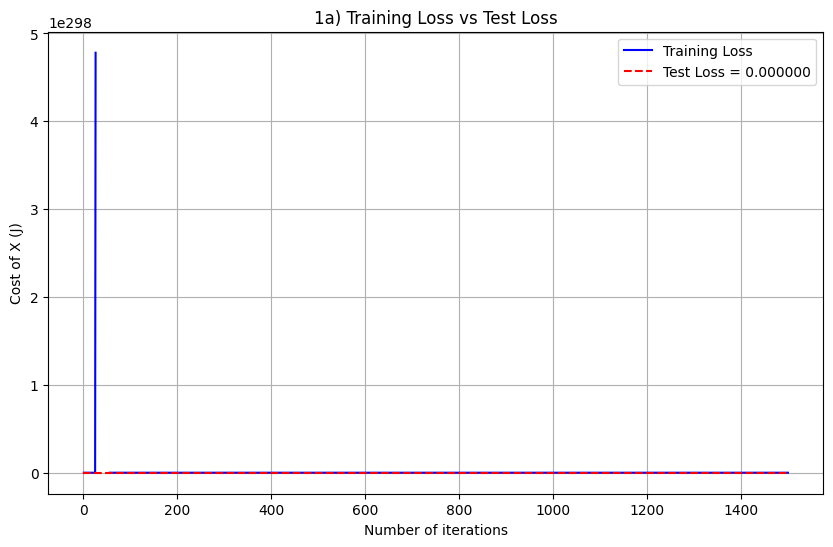

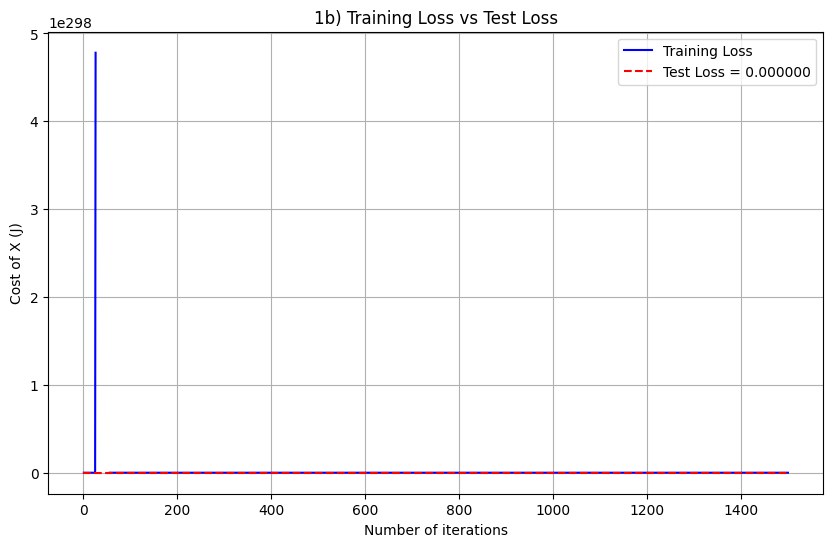

In [ ]:
# 1a)
plt.figure
plt.plot(range(1, iterations + 1), loss_history_1a, color='blue', label='Training Loss')
plt.hlines(y=test_loss_1a, xmin=0, xmax=iterations, color='red', linestyle='--', label=f'Test Loss = {test_loss_1a:.6f}')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('Number of iterations')
plt.ylabel('Cost of X (J)')
plt.title('1a) Training Loss vs Test Loss')
plt.legend()
# Show the plot
plt.show()

# 1b)
plt.figure
plt.plot(range(1, iterations + 1), loss_history_1b, color='blue', label='Training Loss')
plt.hlines(y=test_loss_1b, xmin=0, xmax=iterations, color='red', linestyle='--', label=f'Test Loss = {test_loss_1b:.6f}')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('Number of iterations')
plt.ylabel('Cost of X (J)')
plt.title('1b) Training Loss vs Test Loss')
plt.legend()
